## Contexto

Em uma transportadora, temos um problema onde temos produtos com características de nome, tamanho (em metros cúbicos) e valor, assim como, temos um caminhão com um limite de tamanho. Precisamos levar o máximo de produtos que conseguirmos, porém, é necessário priorizar o valor dos produtos, ou seja, os produtos mais caros que consequentemente darão mais lucro deverão estar no caminhão sem ultrapassar o valor máximo de tamanho.

Para isso, é necessário criar um algoritmo genético onde a solução tem como objetivo **maximizar o valor de lucro** nesse transporte para a transportadora.

In [325]:
import matplotlib.pyplot as plt

### Classe produtos

Primeiramente, iremos declarar a classe produto.

In [326]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

In [327]:
lista_produtos: list[Produto] = []

lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

[p.nome for p in lista_produtos]

['Geladeira Dako',
 'Iphone 6',
 "TV 55' ",
 "TV 50' ",
 "TV 42' ",
 'Notebook Dell',
 'Ventilador Panasonic',
 'Microondas Electrolux',
 'Microondas LG',
 'Microondas Panasonic',
 'Geladeira Brastemp',
 'Geladeira Consul',
 'Notebook Lenovo',
 'Notebook Asus']

### Classe indivíduo

A primeira fase de um algoritmo genético é **gerar a população inicial**. A população é caracterizada por um **conjunto de indivíduos**.

geracao=0 significa que quando um indivíduo for criado, ele inicialmente não evoluiu nada.

Iremos aleatorizar o cromossomo (solução do indivíduo) na inicialização da classe como 0 ou 1, pois existem 2 tipos de estados de um produto, *irá levar* ou *não irá levar* o produto no caminhão.

Para o nosso caso, a *nota_avaliacao* será o somatório dos valores (R$) da carga.

In [328]:
from random import random # A função random por padrão retorna um número de 0 a 1

class Individuo():
    def __init__(self, espacos, valores, limite_espacos, geracao=0):
        self.espacos = espacos # Os espaços de todos os produtos que podem ser carregados (em m³)
        self.valores = valores # Valores em reais
        self.limite_espacos = limite_espacos # Limite do espaço (caminhão)
        self.nota_avaliacao = 0 # Cada indivíduo terá uma nota que definirá se ele é bom ou ruim comparado aos outros (R$)
        self.espaco_usado = 0
        self.geracao = geracao # Geração atual do indivíduo
        self.cromossomo = [] # Solução do indivíduo, cada um dos elementos do array é chamado de Gene
        
        # Inicializando a solução aleatóriamente
        for i in range(len(espacos)):
            if random() < 0.5: # 50% de chance de inicializar com zero ou um
                self.cromossomo.append('0')
            else:
                self.cromossomo.append('1')
    
    # Função de avaliação/aptidão (Fitness)
    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        
        # Soma os espaços e os valores dos produtos
        for idx, i in enumerate(self.cromossomo):
            if i == "1":
                soma_espacos += self.espacos[idx]
                nota += self.valores[idx]
                
        # Caso a nota for maior que o limite, rebaixa a nota, pois não é uma boa solução
        if soma_espacos > self.limite_espacos:
            nota = 1 # Por padrão é utilizado o valor 1 para rebaixar a nota em algoritmos genéticos

        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
    
    # Crossover
    def cruzamento(self, outro_individuo):
        # Adquire o ponto de corte
        corte = round(random() * len(self.cromossomo))
        
        # Filho 1 terá no inicio os genes do outro_individuo, e no final os genes do próprio indivíduo
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::] # :: adquire do corte até o final do array
        
        # Com o filho 2, será basicamente a mesma coisa, só mudou a ordem
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        
        filhos = [
            Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
            Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
        ]
        
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        
        return filhos
    
    # Para cada gene, será gerado um número aleatório e caso ele for menor que a taxa_mutacao irá alterar aquele gene específico
    def mutacao(self, taxa_mutacao):
        #print('Antes ', self.cromossomo)
        
        for idx, i in enumerate(self.cromossomo):
            if random() < taxa_mutacao:
                if self.cromossomo[idx] == "1":
                    self.cromossomo[idx] = "0"
                else:
                    self.cromossomo[idx] = "1"
        
        #print('Depois', self.cromossomo)
        
        return self

In [329]:
import pandas as pd

espacos = []
valores = []
nomes = []

limite = 3

for p in lista_produtos:
    espacos.append(p.espaco)
    valores.append(p.valor)
    nomes.append(p.nome)

In [330]:
df = pd.DataFrame({
    'Nome': nomes,
    'Espaço': espacos,
    'Valor':valores,
})

df.head()

,Nome,Espaço,Valor
0,Geladeira Dako,0.75100,999.90
1,Iphone 6,0.00009,2911.12
2,TV 55',0.40000,4346.99
3,TV 50',0.29000,3999.90
4,TV 42',0.20000,2999.00


**Declarando e exibindo uma classe indivíduo de exemplo**

Iremos criar o indivíduo com todos os espaços e valores disponíveis, o cromossomo (solução) será inicializada aleatóriamente e a geração será definida como 0 (zero) por padrão.

In [331]:
individuo1 = Individuo(espacos, valores, limite)

In [332]:
print('Espaços = ', str(individuo1.espacos))
print('Valores = ', str(individuo1.valores))
print('Cromossomo (resultado) = ', str(individuo1.cromossomo))

print('\nComponentes da carga')
for i in range(len(lista_produtos)):
    if individuo1.cromossomo[i] == "1":
        print(f'Nome: {lista_produtos[i].nome} R$ {lista_produtos[i].valor}')

# Também é possível da forma abaixo:
# for idx, i in enumerate(individuo1.cromossomo):
#     if i == "1":
#         print(lista_produtos[idx].nome)

Espaços =  [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Valores =  [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Cromossomo (resultado) =  ['0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0']

Componentes da carga
Nome: Iphone 6 R$ 2911.12
Nome: TV 55'  R$ 4346.99
Nome: TV 50'  R$ 3999.9
Nome: TV 42'  R$ 2999.0
Nome: Notebook Dell R$ 2499.9
Nome: Microondas LG R$ 429.9
Nome: Microondas Panasonic R$ 299.29
Nome: Geladeira Brastemp R$ 849.0
Nome: Notebook Lenovo R$ 1999.9


**Realizando a avaliação do indivíduo de exemplo**

In [333]:
# Realiza os cálculos para a avaliação
individuo1.avaliacao()

print(f'Nota (R$): {individuo1.nota_avaliacao} \nEspaço usado: {individuo1.espaco_usado:.4f} m³')

Nota (R$): 20335.000000000004 
Espaço usado: 2.1129 m³


### Crossover/reprodução

Aqui será realizado o cruzamento entre 2 indivíduos.

Com a função de cruzamento criada na classe de Indivíduo, basta criarmos mais um indivíduo e realizar o cruzamento como no exemplo abaixo:

In [334]:
individuo2 = Individuo(espacos, valores, limite)

In [335]:
filhos = individuo1.cruzamento(individuo2)

In [336]:
filhos[0].cromossomo

['0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0']

### Mutação

A mutação muda aleatoriamente os **genes** de um cromossomo pertencente a um indivíduo com uma taxa de probabilidade bem baixa.

In [337]:
[filho.mutacao(0.05) for filho in filhos]

### Inicialização da população

Uma população é um conjunto de indivíduos.

In [338]:
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao: list[Individuo] = [] # Armazenará uma lista de indivíduos de acordo com o tamanho da população
        #self.geracao = 0
        self.melhor_solucao = 0 # Armazena qual dos indivíduos tem a melhor solução (maior nota e não extrapole o limite total de capacidade) (Armazena o objeto indivíduo inteiro)
        self.lista_solucoes = []
        
    def inicializa_populacao(self, espacos, valores, limite_espacos):
        self.populacao = [Individuo(espacos, valores, limite_espacos) for i in range(self.tamanho_populacao)]
        self.melhor_solucao = self.populacao[0] # Na inicialização da população, define a melhor solução como a primeira (porém, n é a verdade, apenas inicializa)        
    
    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key=lambda populacao: populacao.nota_avaliacao, # Lambda para definir qual será a chave para ordenação da lista, no caso, será a nota de avaliação
                                reverse=True) # Do maior para o menor
    
    # Compara o um indivíduo especifico vindo do parametro com a melhor_solucao
    # Nota: esta função é opcional, pois é possível adquirir a melhor solução simplesmente ordenando o array de população em ordem decrescente pela nota de avaliação e pegando o 1° índice
    def melhor_individuo(self, individuo: Individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
    
    # Soma todas as avaliações de cada indivíduo da população
    def soma_avaliacoes(self):
        return sum([i.nota_avaliacao for i in self.populacao])
    
    # Fará a simulação do processo da Roleta Viciada, retorna o índice do elemento selecionado
    def seleciona_pai(self, soma_avaliacao):
        pai = -1 # Inicializa como -1 (não selecionou nenhum pai)
        valor_sorteado = random() * soma_avaliacao # Gera um número aleatório entre 0 e 1 e multiplica pelo somatório das notas
        soma = 0
        i = 0
        
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai

    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print(f'G: {self.populacao[0].geracao} -> Valor: {melhor.nota_avaliacao:.2f} Espaço: {melhor.espaco_usado:.2f} Cromossomo: {melhor.cromossomo}')

    # Algoritmo completo, esta função irá fazer todo o processo de uma só vez
    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        # Inicializa a população
        self.inicializa_populacao(espacos, valores, limite_espacos)
        
        for geracao in range(numero_geracoes):
            # Realiza a avaliação para cada um dos indivíduos da geração atual
            for individuo in self.populacao:
                individuo.avaliacao()
                
            # Ordena a população pela nota de avaliação
            self.ordena_populacao()

            # Seleciona o melhor indivíduo
            self.melhor_individuo(self.populacao[0])

            self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)
            
            # Exibe alguns detalhes da geração atual
            self.visualiza_geracao()
    
            # Soma as avaliações
            soma = self.soma_avaliacoes()
    
            nova_populacao: list[Individuo] = []
            for i in range(0, self.tamanho_populacao, 2):
                # Seleção de indivíduos (pais)
                pai_indice1 = self.seleciona_pai(soma)
                pai_indice2 = self.seleciona_pai(soma)
    
                # Cruzamento (crossover) dos dois indivíduos para gerar 2 filhos
                filhos = self.populacao[pai_indice1].cruzamento(self.populacao[pai_indice2])
    
                # Realiza mutação dos filhos
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
    
            # Define nova população para a próxima geração
            self.populacao = nova_populacao
        
        print(f'Melhor solução -> G: {self.melhor_solucao.geracao} Valor: {self.melhor_solucao.nota_avaliacao:.2f} Espaco: {self.melhor_solucao.espaco_usado:.2f} Cromossomo: {self.melhor_solucao.cromossomo}')
        
        return self.melhor_solucao
    

In [339]:
tamanho_populacao = 20

**Inicialização da população inicial**

In [340]:
ag = AlgoritmoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

**Avaliação da população e identificando melhor indivíduo**

In [341]:
# Realiza a avaliação para cada um dos indivíduos
for individuo in ag.populacao:
    individuo.avaliacao()
    
# Ordena a população pela nota de avaliação
ag.ordena_populacao()
ag.melhor_individuo(ag.populacao[0]) # Passa simplesmente o primeiro como paramêtro de comparação

In [342]:
for idx, i in enumerate(ag.populacao):
    print(f'*** Indivíduo {idx} *** \n',
          'Cromossomo: ', i.cromossomo, '\n',
          'Nota: ', i.nota_avaliacao, '\n')

*** Indivíduo 0 *** 
 Cromossomo:  ['0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1'] 
 Nota:  19582.53 

*** Indivíduo 1 *** 
 Cromossomo:  ['1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0'] 
 Nota:  18386.610000000004 

*** Indivíduo 2 *** 
 Cromossomo:  ['1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0'] 
 Nota:  17986.0 

*** Indivíduo 3 *** 
 Cromossomo:  ['0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1'] 
 Nota:  15155.539999999999 

*** Indivíduo 4 *** 
 Cromossomo:  ['1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1'] 
 Nota:  14653.449999999999 

*** Indivíduo 5 *** 
 Cromossomo:  ['0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1'] 
 Nota:  13806.46 

*** Indivíduo 6 *** 
 Cromossomo:  ['1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1'] 
 Nota:  13344.97 

*** Indivíduo 7 *** 
 Cromossomo:  ['0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1'

In [343]:
print(f'*** Melhor solução *** \n',
          'Cromossomo: ', ag.melhor_solucao.cromossomo, '\n',
          'Nota: ', ag.melhor_solucao.nota_avaliacao)

*** Melhor solução *** 
 Cromossomo:  ['0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1'] 
 Nota:  19582.53


### Soma das avaliações

O objetivo de fazer essa processo é que o próximo passo seria realizar a **seleção dos melhores indivíduos** e para fazer esta seleção seria necessário ter o proporcional da nota de cada um deles (somatório das notas).

In [344]:
soma = ag.soma_avaliacoes()
print('Soma das avaliações: ', soma)

Soma das avaliações:  210623.87999999998


### Seleção dos indivíduos (pais) e construção de nova geração

Iremos utilizar o método para seleção chamado **roleta viciada**, onde:

- Cada cromossomo recebe um pedaço proporcional à sua avaliação e a roleta é rodada.
- Elitismo: módulos de população que preservam os melhores, que garantem a estabilidade do melhor e não sua evolução.
- - Não utilizaremos os melhores indivíduos para realizar evolução a todo momento, apenas preservaremos os mesmos.

In [345]:
nova_populacao = []
taxa_mutacao = 0.01

É realizado a seleção dos indivíduos e da nova população.

In [346]:
for individuos_gerados in range(0, ag.tamanho_populacao, 2):
    # Seleção de indivíduos (pais)
    pai_indice1 = ag.seleciona_pai(soma)
    pai_indice2 = ag.seleciona_pai(soma)
    
    # Cruzamento (crossover) dos dois indivíduos para gerar 2 filhos
    filhos = ag.populacao[pai_indice1].cruzamento(ag.populacao[pai_indice2])
    
    # Realiza mutação dos filhos
    nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
    nova_populacao.append(filhos[1].mutacao(taxa_mutacao))

ag.populacao = list(nova_populacao)

É um processo iterativo, então devemos novamente fazer a avaliação, soma das avaliações, seleção dos indivíduos e geração da nova população para a próxima geração. Podemos fazer um loop de repetição para realizar isto.

### Algoritmo completo com a função *resolver* criada na classe Algoritmo Genético

In [347]:
tamanho_populacao = 20
taxa_mutacao = 0.01
numero_geracoes = 100

In [348]:
ag = AlgoritmoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

In [349]:
resultado = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)

G: 0 -> Valor: 20992.98 Espaço: 2.59 Cromossomo: ['0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1']
G: 1 -> Valor: 17283.34 Espaço: 2.38 Cromossomo: ['0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1']
G: 2 -> Valor: 17847.37 Espaço: 2.48 Cromossomo: ['0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1']
G: 3 -> Valor: 17156.70 Espaço: 2.79 Cromossomo: ['0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1']
G: 4 -> Valor: 17764.56 Espaço: 2.54 Cromossomo: ['0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1']
G: 5 -> Valor: 18065.57 Espaço: 1.26 Cromossomo: ['0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1']
G: 6 -> Valor: 19843.57 Espaço: 2.15 Cromossomo: ['0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1']
G: 7 -> Valor: 21764.46 Espaço: 2.83 Cromossomo: ['0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1']
G: 8 -> Valor: 17755.19 Espaço: 2.53 Cro

In [350]:
print('Melhor combinação de produtos no caminhão:\n')

for idx, p in enumerate(lista_produtos):
    if resultado.cromossomo[idx] == "1":
        print(f'Nome: {p.nome} R$ {p.valor}')

Melhor combinação de produtos no caminhão:

Nome: Iphone 6 R$ 2911.12
Nome: TV 55'  R$ 4346.99
Nome: TV 50'  R$ 3999.9
Nome: TV 42'  R$ 2999.0
Nome: Notebook Dell R$ 2499.9
Nome: Microondas Electrolux R$ 308.66
Nome: Microondas LG R$ 429.9
Nome: Microondas Panasonic R$ 299.29
Nome: Geladeira Consul R$ 1199.89
Nome: Notebook Lenovo R$ 1999.9
Nome: Notebook Asus R$ 3999.0


### Visualização dos resultados

Text(0, 0.5, 'Notas R$')

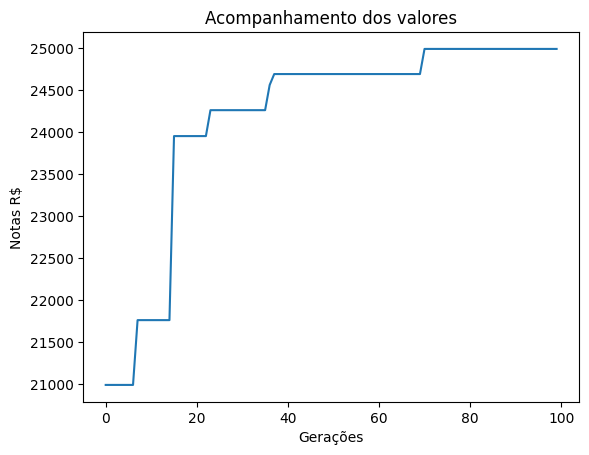

In [351]:
plt.title('Acompanhamento dos valores')
plt.plot(ag.lista_solucoes)
plt.xlabel('Gerações')
plt.ylabel('Notas R$')